Скрипт для нахождения всех конфигов игр, в которых используются блоки из 16 тайлов и 1 байта аттрибутов.
После нахождения загружает все найденные конфиги и отрисовывает 1-й блок из него для каждой игры. Используется для проверки игр, в которых первый блок - пустой, состоящий из 16 нулей.

In [25]:
import cadEditorPath
from cadEditorPath import cadEditorDir
import clr
clr.AddReference("CadEditor")
clr.AddReference("PluginVideoNes")
import System
from CadEditor import Globals, ConfigScript, MapViewType
from PluginVideoNes import Video
from IPython.display import display, Image
import os

In [2]:
def applyToAllFilesInFolder(folder, fileexts, func, *params):
  """apply function with params func to all files with extenstions from list fileext in folder
     example:
       applyToAllFilesInFolder ("C:", [".txt"], lambda filename:None)
  """
  def visit(arg, dirname, names):
    for name in names:
      shortName, ext = os.path.splitext(name)
      if ext.lower() in fileexts:
        func(os.path.join(dirname, name), *params)
  os.path.walk(folder, visit, 0)

In [3]:
def isConfig(fname):
    dn,fn = os.path.split(fname)
    return fn.lower().startswith("settings_")

def checkStr(fname, checkStr):
    "check if any line of fname contains checkStr"
    with open(fname, "rt") as f:
        ll = f.readlines()
    return any([l.find(checkStr)!=-1 for l in ll])

def checkFile(fname, configs):
    if isConfig(fname) and checkStr(fname, "Utils.getBlocksFromTiles16Pal1"):
        configs.append(fname)
        

In [4]:
#print all config names, that contains 
configs = []
applyToAllFilesInFolder(cadEditorDir, [".cs"], checkFile, configs)
print "Found", len(configs), "configs"
for c in configs:
    print c

Found 84 configs
d:\DEV\CadEditor\CadEditor/settings_adventure_island_2\Settings_AdventureIsland2-1.cs
d:\DEV\CadEditor\CadEditor/settings_adventure_island_3\Settings_AdventureIsland3-1.cs
d:\DEV\CadEditor\CadEditor/settings_alien_3\Settings_Alien3-1.cs
d:\DEV\CadEditor\CadEditor/settings_alien_3\Settings_Alien3-2.cs
d:\DEV\CadEditor\CadEditor/settings_batman_returns\Settings_BatmanReturns-1.cs
d:\DEV\CadEditor\CadEditor/settings_battletoads\Settings_Battletoads-1.cs
d:\DEV\CadEditor\CadEditor/settings_battletoads\Settings_Battletoads-10.cs
d:\DEV\CadEditor\CadEditor/settings_battletoads\Settings_Battletoads-11.cs
d:\DEV\CadEditor\CadEditor/settings_battletoads\Settings_Battletoads-12.cs
d:\DEV\CadEditor\CadEditor/settings_battletoads\Settings_Battletoads-2.cs
d:\DEV\CadEditor\CadEditor/settings_battletoads\Settings_Battletoads-3.cs
d:\DEV\CadEditor\CadEditor/settings_battletoads\Settings_Battletoads-4.cs
d:\DEV\CadEditor\CadEditor/settings_battletoads\Settings_Battletoads-5.cs
d:\DEV\

In [31]:
pairs = [
    ["settings_adventure_island_2/Settings_AdventureIsland2-1.cs", "Hudson's Adventure Island II (U) [!].nes"],
    ["settings_adventure_island_3/Settings_AdventureIsland3-1.cs", "Hudson's Adventure Island III (U) [!].nes"],
    ["settings_alien_3/Settings_Alien3-1.cs", "Alien 3 (E) [!].nes"],
    ["settings_alien_3/Settings_Alien3-2.cs", "Alien 3 (E) [!].nes"],
    ["settings_batman_returns/Settings_BatmanReturns-1.cs","Batman III [p1].nes"],
    ["settings_battletoads/Settings_Battletoads-1.cs","Battletoads (U) [!].nes"],
    ["settings_battletoads/Settings_Battletoads-10.cs","Battletoads (U) [!].nes"],
    ["settings_battletoads/Settings_Battletoads-11.cs","Battletoads (U) [!].nes"],
    ["settings_battletoads/Settings_Battletoads-12.cs","Battletoads (U) [!].nes"],
    ["settings_battletoads/Settings_Battletoads-2.cs","Battletoads (U) [!].nes"],
    ["settings_battletoads/Settings_Battletoads-3.cs","Battletoads (U) [!].nes"],
    ["settings_battletoads/Settings_Battletoads-4.cs","Battletoads (U) [!].nes"],
    ["settings_battletoads/Settings_Battletoads-5.cs","Battletoads (U) [!].nes"],
    #["settings_battletoads/Settings_Battletoads-6.cs","Battletoads (U) [!].nes"],
    ["settings_battletoads/Settings_Battletoads-7.cs","Battletoads (U) [!].nes"],
    ["settings_battletoads/Settings_Battletoads-8.cs","Battletoads (U) [!].nes"],
    ["settings_battletoads/Settings_Battletoads-9.cs","Battletoads (U) [!].nes"],
    ["settings_battletoads_and_double_dragon/Settings_BattletoadsDoubleDragon-1.cs","Battletoads & Double Dragon - The Ultimate Team (U) [p1][!].nes"],
    ["settings_battletoads_and_double_dragon/Settings_BattletoadsDoubleDragon-2.cs","Battletoads & Double Dragon - The Ultimate Team (U) [p1][!].nes"],
    ["settings_battletoads_and_double_dragon/Settings_BattletoadsDoubleDragon-3.cs","Battletoads & Double Dragon - The Ultimate Team (U) [p1][!].nes"],
    ["settings_battletoads_and_double_dragon/Settings_BattletoadsDoubleDragon-5-2.cs","Battletoads & Double Dragon - The Ultimate Team (U) [p1][!].nes"],
    ["settings_battletoads_and_double_dragon/Settings_BattletoadsDoubleDragon-5.cs","Battletoads & Double Dragon - The Ultimate Team (U) [p1][!].nes"],
    ["settings_battletoads_and_double_dragon/Settings_BattletoadsDoubleDragon-6.cs","Battletoads & Double Dragon - The Ultimate Team (U) [p1][!].nes"],
    ["settings_battletoads_and_double_dragon/Settings_BattletoadsDoubleDragon-7.cs","Battletoads & Double Dragon - The Ultimate Team (U) [p1][!].nes"],
    ["settings_bucky_ohare/Settings_Bucky-1-1.cs","Bucky O'Hare (E).nes"],
    ["settings_contra_force/Settings_ContraForce-1.cs","Contra Force (U) [!].nes"],
    ["settings_contra_force/Settings_ContraForce-3.cs","Contra Force (U) [!].nes"],
    ["settings_contra_force/Settings_ContraForce-4.cs","Contra Force (U) [!].nes"],
    ["settings_contra_force/Settings_ContraForce-5.cs","Contra Force (U) [!].nes"],
    ["settings_darkman/Settings_Darkman-1.cs","Darkman (U) [!].nes"],
    ["settings_jackie_chan/Settings_JackieChan-1-1.cs","Jackie Chan's Action Kung Fu (U) [!p].nes"],
    ["settings_jackie_chan/Settings_JackieChan-1-2.cs","Jackie Chan's Action Kung Fu (U) [!p].nes"],
    ["settings_jackie_chan/Settings_JackieChan-1-3.cs","Jackie Chan's Action Kung Fu (U) [!p].nes"],
    ["settings_jackie_chan/Settings_JackieChan-1-4.cs","Jackie Chan's Action Kung Fu (U) [!p].nes"],
    ["settings_jackie_chan/Settings_JackieChan-1-5.cs","Jackie Chan's Action Kung Fu (U) [!p].nes"],
    ["settings_jackie_chan/Settings_JackieChan-1-6.cs","Jackie Chan's Action Kung Fu (U) [!p].nes"],
    ["settings_jackie_chan/Settings_JackieChan-1-7.cs","Jackie Chan's Action Kung Fu (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_normal_Number_1.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_normal_Number_10.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_normal_Number_2.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_normal_Number_3.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_normal_Number_4.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_normal_Number_5.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_normal_Number_6.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_normal_Number_7.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_normal_Number_8.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_normal_Number_9.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_super_advanced_Number_1.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_super_advanced_Number_10.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_super_advanced_Number_2.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_super_advanced_Number_3.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_super_advanced_Number_4.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_super_advanced_Number_5.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_super_advanced_Number_6.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_super_advanced_Number_7.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_super_advanced_Number_8.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_mickey_s_adventures_in_numberland/Settings_super_advanced_Number_9.cs","Mickey's Adventures in Numberland (U) [!p].nes"],
    ["settings_monster_in_my_pocket/Settings_MonsterInMyPocket-1-2.cs","Monster In My Pocket (U) [!].nes"],
    ["settings_monster_in_my_pocket/Settings_MonsterInMyPocket-1.cs","Monster In My Pocket (U) [!].nes"],
    ["settings_power_blade/Settings_PowerBlade-1.cs","Power Blade (E) [!].nes"],
    ["settings_power_blade_2/Settings_PowerBlade2-1.cs","Power Blade 2 (U) [!].nes"],
    ["settings_super_c/Settings_SuperC-1.cs","Super C (U) [!].nes"],
    ["settings_tmnt/Settings_Tmnt-1.cs","Teenage Mutant Ninja Turtles (U) [!].nes"],
    ["settings_tmnt2/Settings_Tmnt2-1.cs","Teenage Mutant Ninja Turtles II - The Arcade Game (U) [!].nes"],
    ["settings_tmnt2/Settings_Tmnt2-10.cs","Teenage Mutant Ninja Turtles II - The Arcade Game (U) [!].nes"],
    ["settings_tmnt2/Settings_Tmnt2-2.cs","Teenage Mutant Ninja Turtles II - The Arcade Game (U) [!].nes"],
    ["settings_tmnt2/Settings_Tmnt2-3.cs","Teenage Mutant Ninja Turtles II - The Arcade Game (U) [!].nes"],
    ["settings_tmnt2/Settings_Tmnt2-4.cs","Teenage Mutant Ninja Turtles II - The Arcade Game (U) [!].nes"],
    ["settings_tmnt2/Settings_Tmnt2-5.cs","Teenage Mutant Ninja Turtles II - The Arcade Game (U) [!].nes"],
    ["settings_tmnt2/Settings_Tmnt2-6.cs","Teenage Mutant Ninja Turtles II - The Arcade Game (U) [!].nes"],
    ["settings_tmnt2/Settings_Tmnt2-7.cs","Teenage Mutant Ninja Turtles II - The Arcade Game (U) [!].nes"],
    ["settings_tmnt2/Settings_Tmnt2-8.cs","Teenage Mutant Ninja Turtles II - The Arcade Game (U) [!].nes"],
    ["settings_tmnt2/Settings_Tmnt2-9.cs","Teenage Mutant Ninja Turtles II - The Arcade Game (U) [!].nes"],
    ["settings_tmnt3/Settings_Tmnt3-1.cs","Teenage Mutant Ninja Turtles III - The Manhattan Project (U) [!].nes"],
    ["settings_tmnt3/Settings_Tmnt3-2.cs","Teenage Mutant Ninja Turtles III - The Manhattan Project (U) [!].nes"],
    ["settings_tmnt3/Settings_Tmnt3-3.cs","Teenage Mutant Ninja Turtles III - The Manhattan Project (U) [!].nes"],
    ["settings_tmnt3/Settings_Tmnt3-4-2.cs","Teenage Mutant Ninja Turtles III - The Manhattan Project (U) [!].nes"],
    ["settings_tmnt3/Settings_Tmnt3-4.cs","Teenage Mutant Ninja Turtles III - The Manhattan Project (U) [!].nes"],
    ["settings_tmnt3/Settings_Tmnt3-5.cs","Teenage Mutant Ninja Turtles III - The Manhattan Project (U) [!].nes"],
    ["settings_tmnt3/Settings_Tmnt3-6.cs","Teenage Mutant Ninja Turtles III - The Manhattan Project (U) [!].nes"],
    ["settings_tmnt3/Settings_Tmnt3-8-2.cs","Teenage Mutant Ninja Turtles III - The Manhattan Project (U) [!].nes"],
    ["settings_tmnt3/Settings_Tmnt3-8-3.cs","Teenage Mutant Ninja Turtles III - The Manhattan Project (U) [!].nes"],
    ["settings_tmnt3/Settings_Tmnt3-8.cs","Teenage Mutant Ninja Turtles III - The Manhattan Project (U) [!].nes"],
    ["settings_yonoid/Settings_YoNoid-1.cs","Teenage Mutant Ninja Turtles III - The Manhattan Project (U) [!].nes"],
]

Settings_AdventureIsland2-1.cs


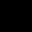

Settings_AdventureIsland3-1.cs


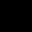

Settings_Alien3-1.cs


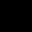

Settings_Alien3-2.cs


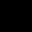

Settings_BatmanReturns-1.cs


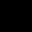

Settings_Battletoads-1.cs


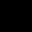

Settings_Battletoads-10.cs


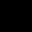

Settings_Battletoads-11.cs


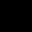

Settings_Battletoads-12.cs


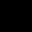

Settings_Battletoads-2.cs


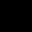

Settings_Battletoads-3.cs


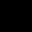

Settings_Battletoads-4.cs


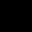

Settings_Battletoads-5.cs


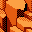

Settings_Battletoads-7.cs


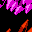

Settings_Battletoads-8.cs


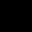

Settings_Battletoads-9.cs


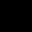

Settings_BattletoadsDoubleDragon-1.cs


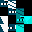

Settings_BattletoadsDoubleDragon-2.cs


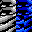

Settings_BattletoadsDoubleDragon-3.cs


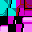

Settings_BattletoadsDoubleDragon-5-2.cs


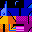

Settings_BattletoadsDoubleDragon-5.cs


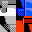

Settings_BattletoadsDoubleDragon-6.cs


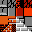

Settings_BattletoadsDoubleDragon-7.cs


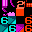

Settings_Bucky-1-1.cs


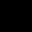

Settings_ContraForce-1.cs


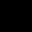

Settings_ContraForce-3.cs


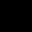

Settings_ContraForce-4.cs


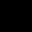

Settings_ContraForce-5.cs


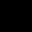

Settings_Darkman-1.cs


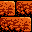

Settings_JackieChan-1-1.cs


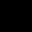

Settings_JackieChan-1-2.cs


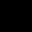

Settings_JackieChan-1-3.cs


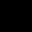

Settings_JackieChan-1-4.cs


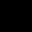

Settings_JackieChan-1-5.cs


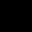

Settings_JackieChan-1-6.cs


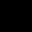

Settings_JackieChan-1-7.cs


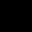

Settings_normal_Number_1.cs


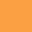

Settings_normal_Number_10.cs


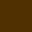

Settings_normal_Number_2.cs


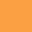

Settings_normal_Number_3.cs


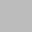

Settings_normal_Number_4.cs


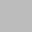

Settings_normal_Number_5.cs


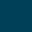

Settings_normal_Number_6.cs


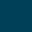

Settings_normal_Number_7.cs


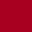

Settings_normal_Number_8.cs


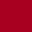

Settings_normal_Number_9.cs


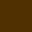

Settings_super_advanced_Number_1.cs


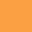

Settings_super_advanced_Number_10.cs


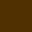

Settings_super_advanced_Number_2.cs


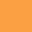

Settings_super_advanced_Number_3.cs


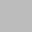

Settings_super_advanced_Number_4.cs


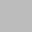

Settings_super_advanced_Number_5.cs


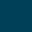

Settings_super_advanced_Number_6.cs


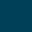

Settings_super_advanced_Number_7.cs


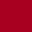

Settings_super_advanced_Number_8.cs


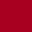

Settings_super_advanced_Number_9.cs


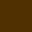

Settings_MonsterInMyPocket-1-2.cs


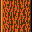

Settings_MonsterInMyPocket-1.cs


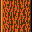

Settings_PowerBlade-1.cs


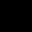

Settings_PowerBlade2-1.cs


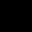

Settings_SuperC-1.cs


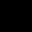

Settings_Tmnt-1.cs


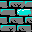

Settings_Tmnt2-1.cs


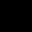

Settings_Tmnt2-10.cs


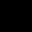

Settings_Tmnt2-2.cs


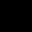

Settings_Tmnt2-3.cs


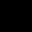

Settings_Tmnt2-4.cs


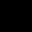

Settings_Tmnt2-5.cs


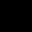

Settings_Tmnt2-6.cs


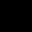

Settings_Tmnt2-7.cs


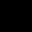

Settings_Tmnt2-8.cs


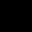

Settings_Tmnt2-9.cs


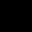

Settings_Tmnt3-1.cs


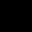

Settings_Tmnt3-2.cs


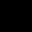

Settings_Tmnt3-3.cs


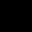

Settings_Tmnt3-4-2.cs


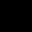

Settings_Tmnt3-4.cs


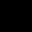

Settings_Tmnt3-5.cs


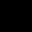

Settings_Tmnt3-6.cs


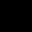

Settings_Tmnt3-8-2.cs


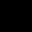

Settings_Tmnt3-8-3.cs


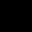

Settings_Tmnt3-8.cs


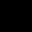

Settings_YoNoid-1.cs


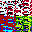

In [32]:
#draw first block of config
picPath = "D:/CadEditorPythonExamples/"
video = Video()
makeObjects = video.makeObjects.Overloads[System.Byte, System.Byte, System.Byte, System.Single, MapViewType, System.Int32]
for cn, rn in pairs:
    rn = os.path.join(cadEditorDir, rn)
    cn = os.path.join(cadEditorDir, cn)
    Globals.loadData(rn, "", cn)
    bb = makeObjects(0x90, 0, 0, 1.0, MapViewType.Tiles, -1)
    fn = picPath+"objects0.png"
    print os.path.split(cn)[1]
    bb[0].Save(fn)
    display(Image(fn))